In [1]:
# Apply The Simple Linear regression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df = pd.read_csv('weight_height_data.csv')

In [11]:
df.head(5)

,Weight (kg),Height (cm)
0,65,170
1,72,175
2,58,162
3,80,182
4,70,178


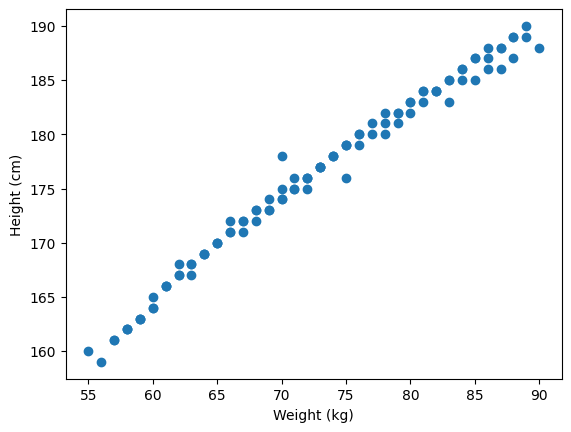

In [12]:
# what is relationship weight and height
# so we use Scatter point 

plt.scatter(df['Weight (kg)'], df['Height (cm)'])

plt.xlabel('Weight (kg)')

plt.ylabel('Height (cm)')
plt.show()

In [13]:
## Find the Corr
df.corr()

,Weight (kg),Height (cm)
Weight (kg),1.000000,0.991943
Height (cm),0.991943,1.000000


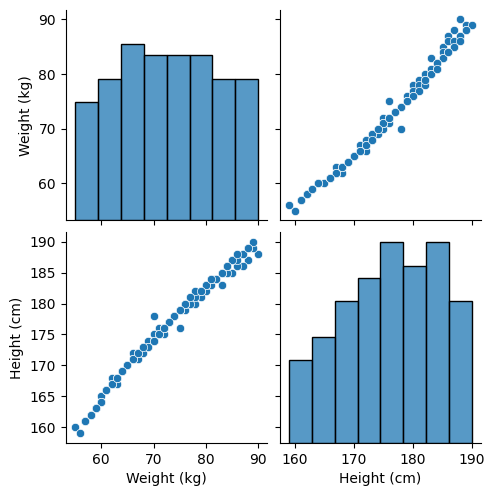

In [14]:
## use seaborn for visulization 
import seaborn as sns
sns.pairplot(df)

<Axes: >

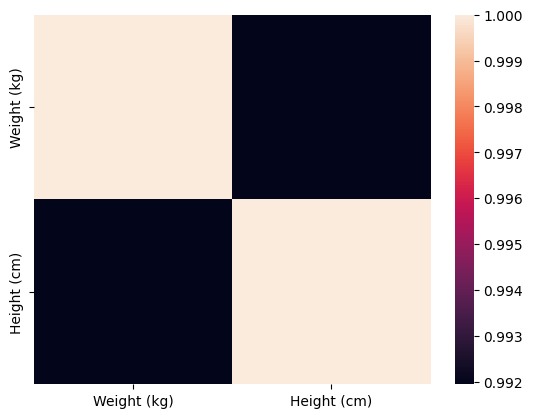

In [16]:
sns.heatmap(df.corr())

# In series the independent feature

In [23]:
# Independent feature and dependent features
X = df['Weight (kg)']
type(X)
np.array(X).shape
y = df['Height (cm)']

# In datafram the dependent feature

In [ ]:
## here it is a series but we need a dataframe so we make it as 
X = df[['Height (cm)']]
type(X)
Y = df['Height (cm)']
#  dependent feature need to be in series 1D array

In [26]:
# here it is in dataframe 2D
np.array(X).shape

(103, 1)

In [27]:
np.array(Y).shape

(103,)

In [ ]:
## Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

1. random_state --> Pick Random variables from dataset
2. 

In [30]:
## Standerdization 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)


In [33]:
# Apply Machine Learning 

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# HERE it didn't accept 1D array in Xtrian so we covet it 
# Predicting the Test set results

LinearRegression()

1. Fit_intercept --> 
2. N_JOBS   --> N_JOBS if -1 then use all Cores
3. Posiive --> Force to coeficient to become positive


In [36]:
# here it is B1 as a slope
regressor.coef_ 


array([8.059601])

In [39]:
# here it is B1 as a slope
print('The Coefficient or Slope is : ', str(regressor.coef_))

# here it is B0 as a intercept

print('The y-intercept of the line is : ', str(regressor.intercept_))

The Coefficient or Slope is :  [8.059601]
The y-intercept of the line is :  176.4878048780488


In [ ]:
# 1 unit in weight then 8 units in height

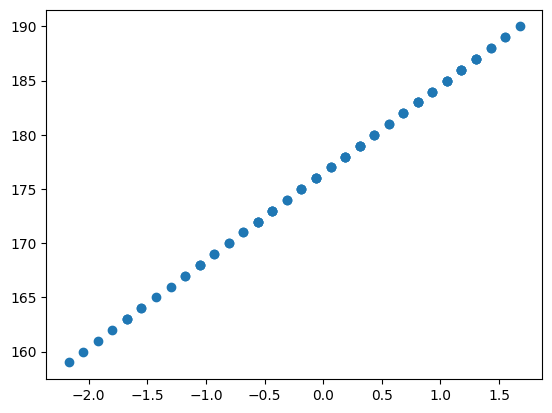

In [41]:
# Plot best Fit Line
plt.scatter(X_train, y_train)

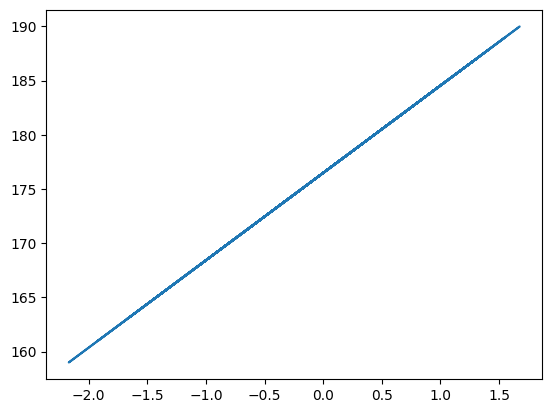

In [ ]:
# Here it is best fit line 
plt.plot(X_train ,regressor.predict(X_train))

In [ ]:
# Prediction For test data

# Prediction Model 
y = intercept + coef_(weight)
y = 176.48 + 8.05(weight)

In [44]:
y_pred = regressor.predict(X_test)

In [45]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [47]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test , y_pred)
rmse = np.sqrt(mse)

In [48]:
print(' MAE : ' + str(mae))

print('MSE : ' + str(mse))

print('RMSE : ' + str(rmse))


 MAE : 0.0
MSE : 0.0
RMSE : 0.0


In [ ]:
# If it is 0 then it is very Good that we said the model is good

# R Square
R Square = 1 - SSR / SST
SSR --> sum of squares of residuals 

SST --> sum of squares of total deviations from mean

In [49]:
from sklearn.metrics import r2_score

r2_score = r2_score(y_test, y_pred)
print(r2_score)

1.0


In [53]:
 ## OlS Techqu
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
model.summary()

c:\Users\omkar\anaconda3\envs\ml_env\lib\site-packages\statsmodels\stats\stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
c:\Users\omkar\anaconda3\envs\ml_env\lib\site-packages\statsmodels\stats\stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
c:\Users\omkar\anaconda3\envs\ml_env\lib\site-packages\scipy\stats\_stats_py.py:1635: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis, _no_deco=True)
c:\Users\omkar\anaconda3\envs\ml_env\lib\site-packages\scipy\stats\_stats_py.py:1747: Runtime

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Height (cm)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.408e+29
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:11:06   Log-Likelihood:                 2900.8
No. Observations:                 103   AIC:                            -5798.
Df Residuals:                     101   BIC:                            -5792.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.421e-13   3.02e-13     -0.470      0.639   -7.41e-13    4.57e-13
Height (cm)     1.0000   1.71e-15   5.84e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.000
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                     3.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
# Prediction for new data
regressor.predict([[72]])

array([756.7790772])

In [58]:
print(regressor.predict(sc.transform([[72]])))

[72.]


c:\Users\omkar\anaconda3\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
